In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv("../ex4/data/avocado_processed.csv")
df.head()

,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,...,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Day-Month-Year,AveragePrice
0,4.962433e-08,0.0,4.962433e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003188,0.000051,0.002702,0.000002,0.000432,0.000427,0.000005,0.0,0.999991,1.33
1,4.962447e-08,0.0,4.962447e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002723,0.000033,0.002215,0.000003,0.000472,0.000467,0.000005,0.0,0.999994,1.35
2,4.962321e-08,0.0,4.962321e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005866,0.000039,0.005416,0.000006,0.000404,0.000399,0.000005,0.0,0.999968,0.93
3,4.962412e-08,0.0,4.962412e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003920,0.000056,0.003572,0.000004,0.000288,0.000282,0.000007,0.0,0.999986,1.08
4,4.962473e-08,0.0,4.962473e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002533,0.000047,0.002175,0.000004,0.000307,0.000297,0.000010,0.0,0.999994,1.28


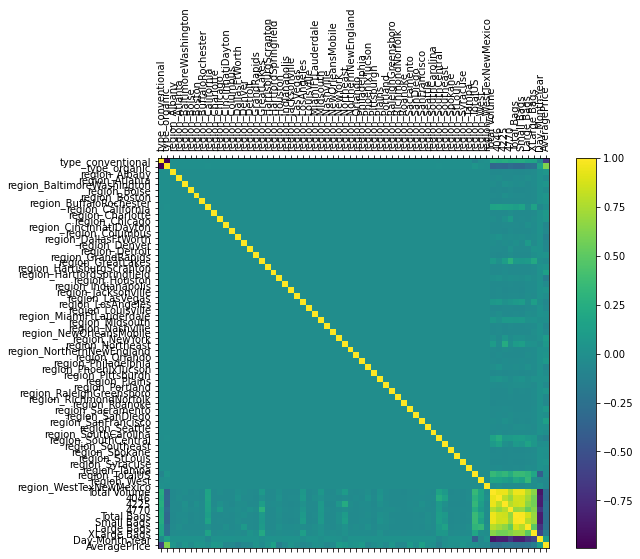

In [ ]:
def corr_heatmap(df):
    corr=df.corr() #figsize=(width,height)
    plt.figure(figsize=(10,7))
    caxes = plt.matshow(corr, fignum=1)
    # axes.set_xticks(labels=df.columns)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.colorbar(caxes)
    plt.show()

corr_heatmap(df)

We can see that most of the columns are not correlated with each other, which is good. This means that we can use all of the columns in our model without dropping any columns. We can also see that the target variable is also not correlated with any of the columns. But type conventional is little negativley correlated with y and type organic is positively correlated with y, which can be inferred that organic type of avocado can improve the price of avacado and conventional type of avocado can degrade the price of it.

In [ ]:
X = df.drop("AveragePrice", axis=1)
y = df["AveragePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)

In [ ]:
#linear regression accuracy
errors = abs(preds - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.19 degrees.
Accuracy: 85.32 %.


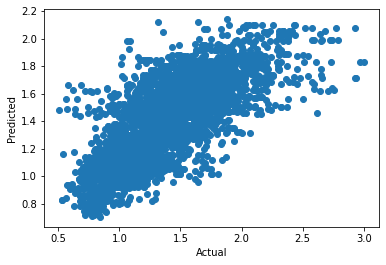

In [ ]:
#plot predicted vs actual
plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

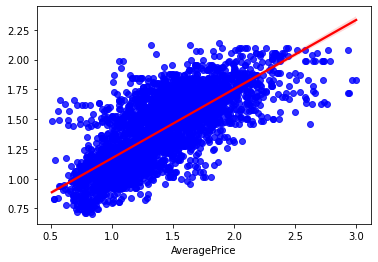

In [ ]:
#scatter plot with heat map and regression line
import seaborn as sns
sns.regplot(x=y_test, y=preds, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()


## Feature Selection

We will take the features that are highly correlated with the target variable.

In [ ]:
#ignore errors
import warnings
warnings.filterwarnings("ignore")

In [ ]:
corr = df.corr()
rel = {}
#take features that are highly correlated with the target
corr_target = abs(corr["AveragePrice"])
threshold = [0.25,0.35,0.5]
for i in threshold:
    # print(i)
    relevant_positive_features = corr_target[corr_target>i]
    relevant_negative_features = corr_target[corr_target<-1*i]
    rel[i] = relevant_negative_features.append(relevant_positive_features)

print(rel)


{0.25: type_conventional    0.608688
type_organic         0.615845
Total Volume         0.278315
4046                 0.294127
Total Bags           0.253378
AveragePrice         1.000000
Name: AveragePrice, dtype: float64, 0.35: type_conventional    0.608688
type_organic         0.615845
AveragePrice         1.000000
Name: AveragePrice, dtype: float64, 0.5: type_conventional    0.608688
type_organic         0.615845
AveragePrice         1.000000
Name: AveragePrice, dtype: float64}


We try with threshold 0.25

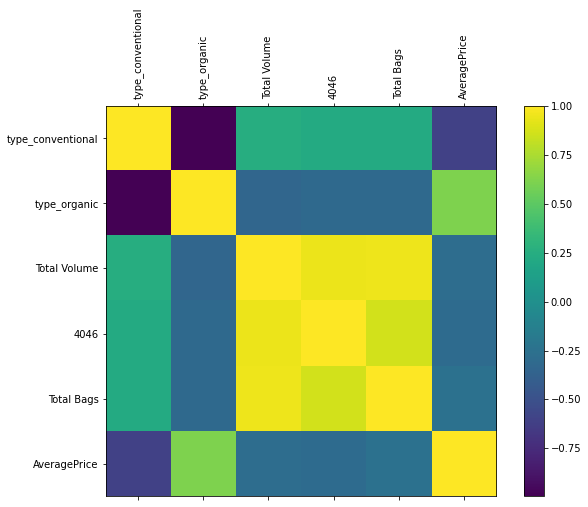

In [ ]:
col1 = rel[0.25].index
df1 = df[col1]
corr_heatmap(df1)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


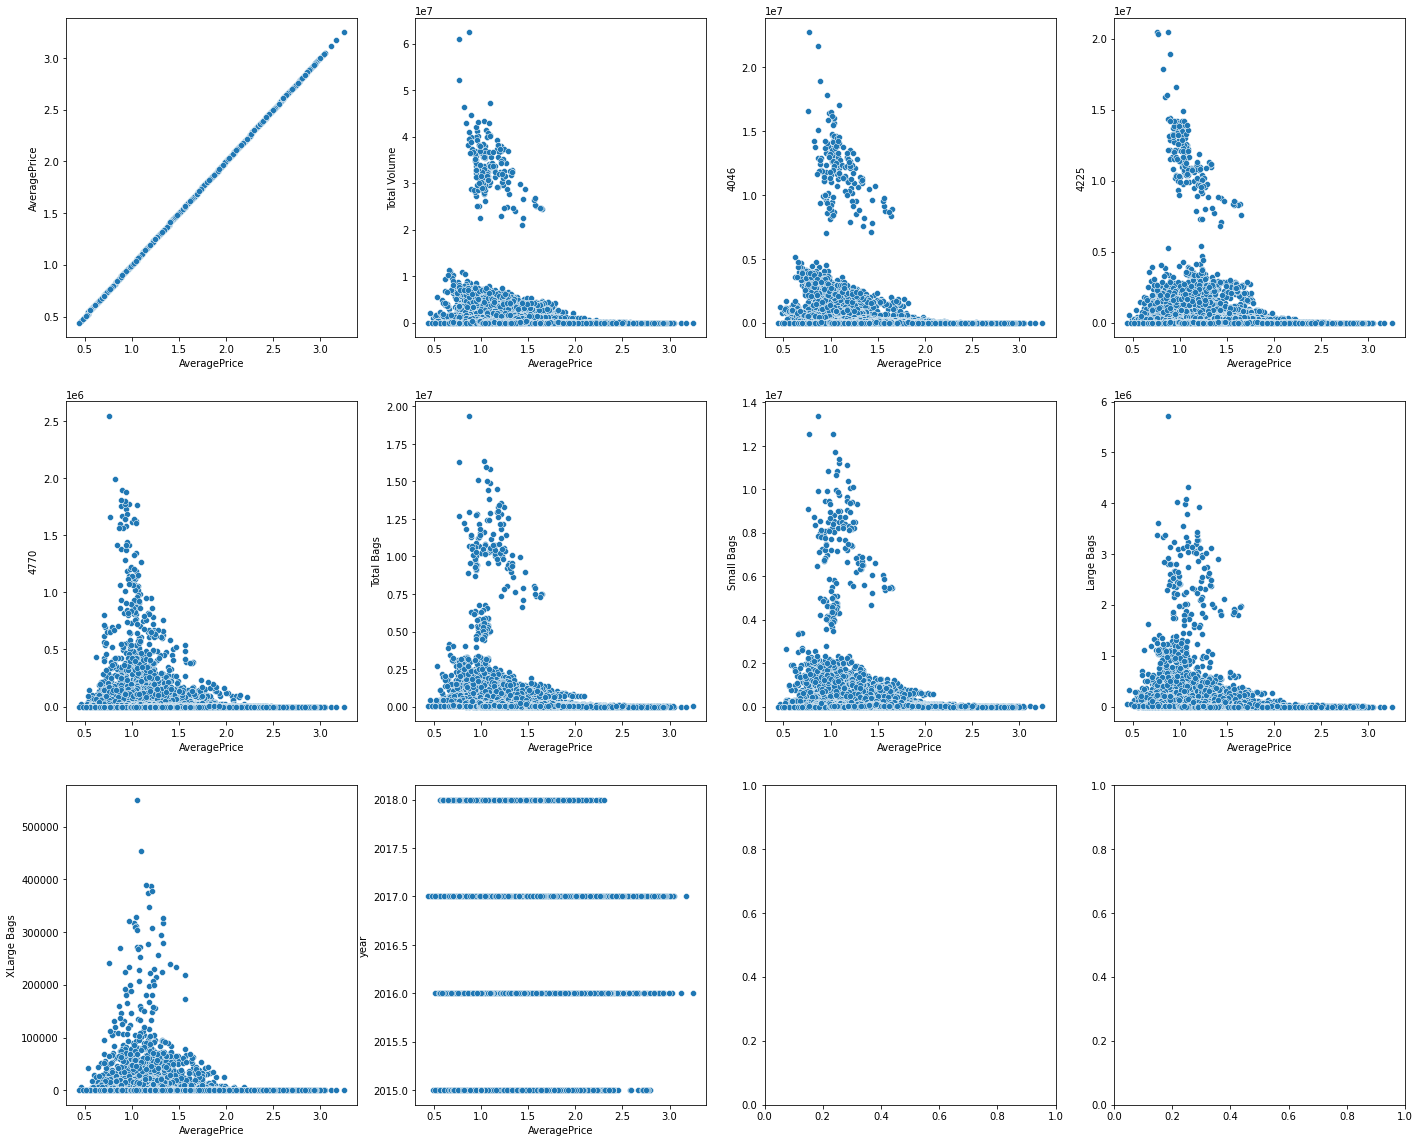

In [ ]:
scdf = pd.read_csv("../ex4/data/avocado.csv")
scdf.drop("Unnamed: 0",axis=1,inplace=True)
numerical_col = [i for i in scdf.columns if scdf[i].dtype!="object"]
print(numerical_col)
fig, axes = plt.subplots(3,4,figsize=(24,20))
axlist = list(axes.flatten())
for k in numerical_col:
    i=axlist.pop(0)
    sns.scatterplot(x=scdf["AveragePrice"],y=scdf[k],ax=i)
    i.set_xlabel("AveragePrice")
    i.set_ylabel(k)



In [ ]:
X1 = df1.drop("AveragePrice", axis=1)
y1 = df1["AveragePrice"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

preds1 = model1.predict(X1_test)
mae1 = mean_absolute_error(y1_test, preds1)

#linear regression accuracy
errors1 = abs(preds1 - y1_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors1), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape1 = 100 * (errors1 / y1_test)
# Calculate and display accuracy
accuracy1 = 100 - np.mean(mape1)
print('Accuracy:', round(accuracy1, 2), '%.')


Mean Absolute Error: 0.24 degrees.
Accuracy: 81.45 %.


We try with threshold 0.35

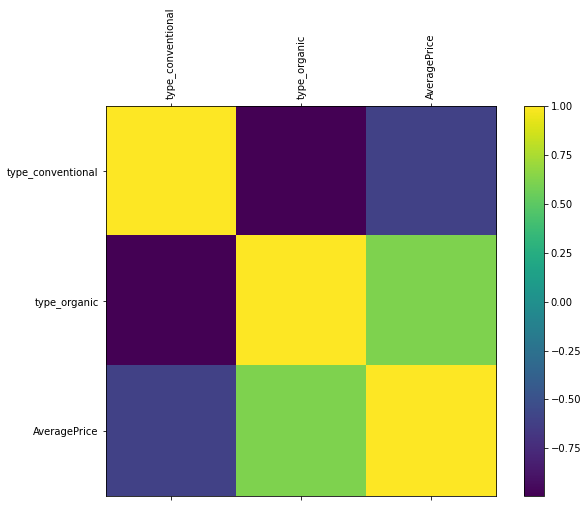

In [ ]:
df2 = df[rel[0.35].index]
corr_heatmap(df2)

In [ ]:
X2 = df2.drop("AveragePrice", axis=1)
y2 = df2["AveragePrice"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

preds2 = model2.predict(X2_test)
mae2 = mean_absolute_error(y2_test, preds2)

#linear regression accuracy
errors2 = abs(preds2 - y2_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape2 = 100 * (errors2 / y2_test)
# Calculate and display accuracy
accuracy2 = 100 - np.mean(mape2)
print('Accuracy:', round(accuracy2, 2), '%.')


Mean Absolute Error: 0.25 degrees.
Accuracy: 81.04 %.


We now try feature selection by removing features that are highly correlated

In [ ]:
#find features that are highly positive and negaitvely correlated with each other
corr = df.corr()
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j]) > 0.75:
            colname = corr.columns[i]
            related = corr.columns[j]
            print(colname, " is highly correlated with ", related)

4046  is highly correlated with  Total Volume
4225  is highly correlated with  Total Volume
4225  is highly correlated with  4046
4770  is highly correlated with  Total Volume
4770  is highly correlated with  4225
Total Bags  is highly correlated with  Total Volume
Total Bags  is highly correlated with  4046
Total Bags  is highly correlated with  4225
Small Bags  is highly correlated with  Total Volume
Small Bags  is highly correlated with  4046
Small Bags  is highly correlated with  4225
Small Bags  is highly correlated with  Total Bags
Large Bags  is highly correlated with  Total Volume
Large Bags  is highly correlated with  Total Bags
Large Bags  is highly correlated with  Small Bags


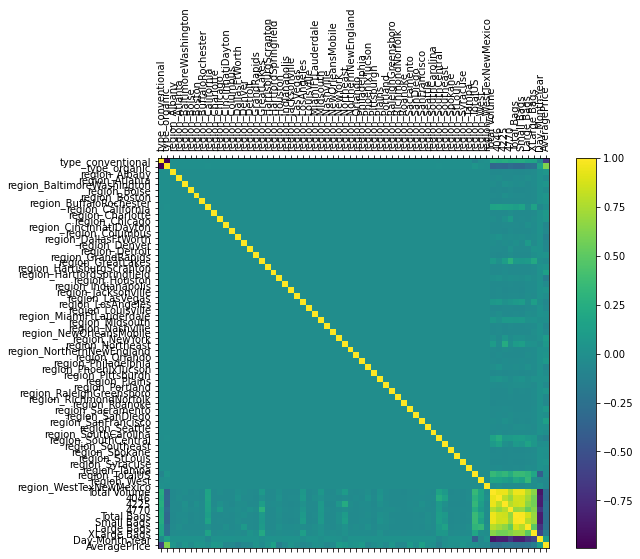

In [ ]:
corr_heatmap(df)

We can see that total bags, Small bags, large bags, Xlarge bags are correlated and total volume, 4225,4046,4770 are correlated

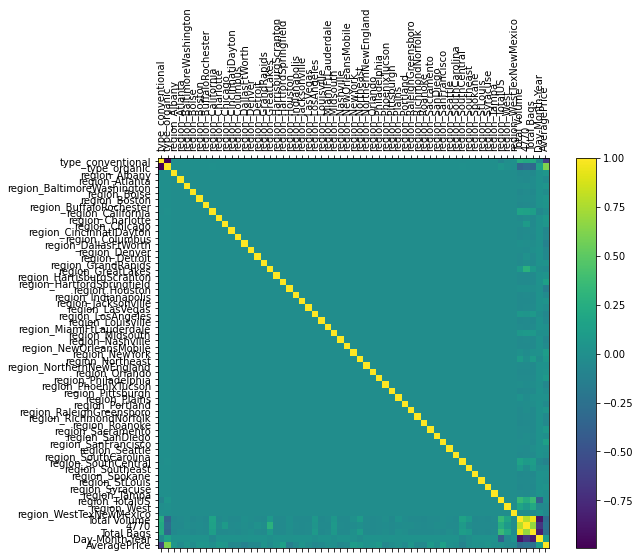

In [ ]:
df3 = df.drop(["Small Bags","Large Bags","XLarge Bags","4225","4046"], axis=1)
corr_heatmap(df3)
X3 = df.drop(["AveragePrice","Small Bags","Large Bags","XLarge Bags","4225","4046"], axis=1)

In [ ]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2,random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y_train)

preds3 = model3.predict(X3_test)
mae3 = mean_absolute_error(y_test, preds3)

#linear regression accuracy
errors3 = abs(preds3 - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors3), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape3 = 100 * (errors3 / y_test)
# Calculate and display accuracy
accuracy3 = 100 - np.mean(mape3)
print('Accuracy:', round(accuracy3, 2), '%.')

Mean Absolute Error: 0.2 degrees.
Accuracy: 84.71 %.
